# Лабораторная работа 3.

# Задание

Mounted at /content/drive


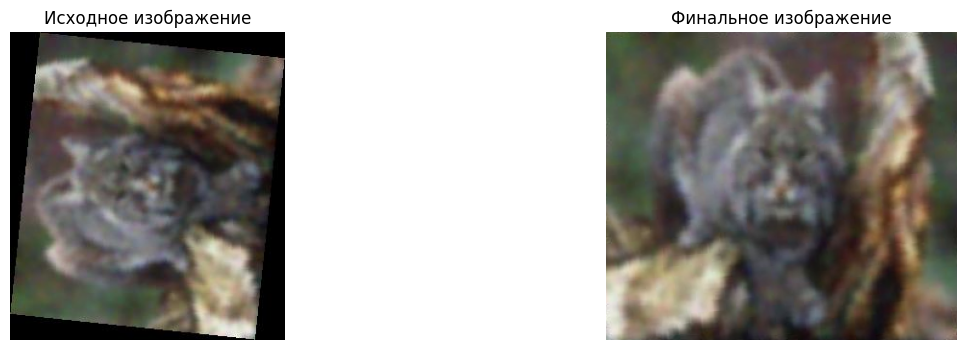

In [1]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import sys


drive.mount('/content/drive')


sys.path.append('/content/drive/My Drive/Colab_Notebooks/COI')


from utility import util


image = cv2.imread('/content/drive/My Drive/Colab_Notebooks/COI/img.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# бинаризация для выделения контуров
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contour = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(contour)
angle = rect[2]


if angle < -45:
    angle = 90 + angle

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

cropped_image = rotated_image[16:-16, 16:-16]

final_rotated_image = cv2.rotate(cropped_image, cv2.ROTATE_90_CLOCKWISE)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Исходное изображение')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(final_rotated_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Финальное изображение')
axes[1].axis('off')

plt.show()

## Повышение резкости

## Фильтрация


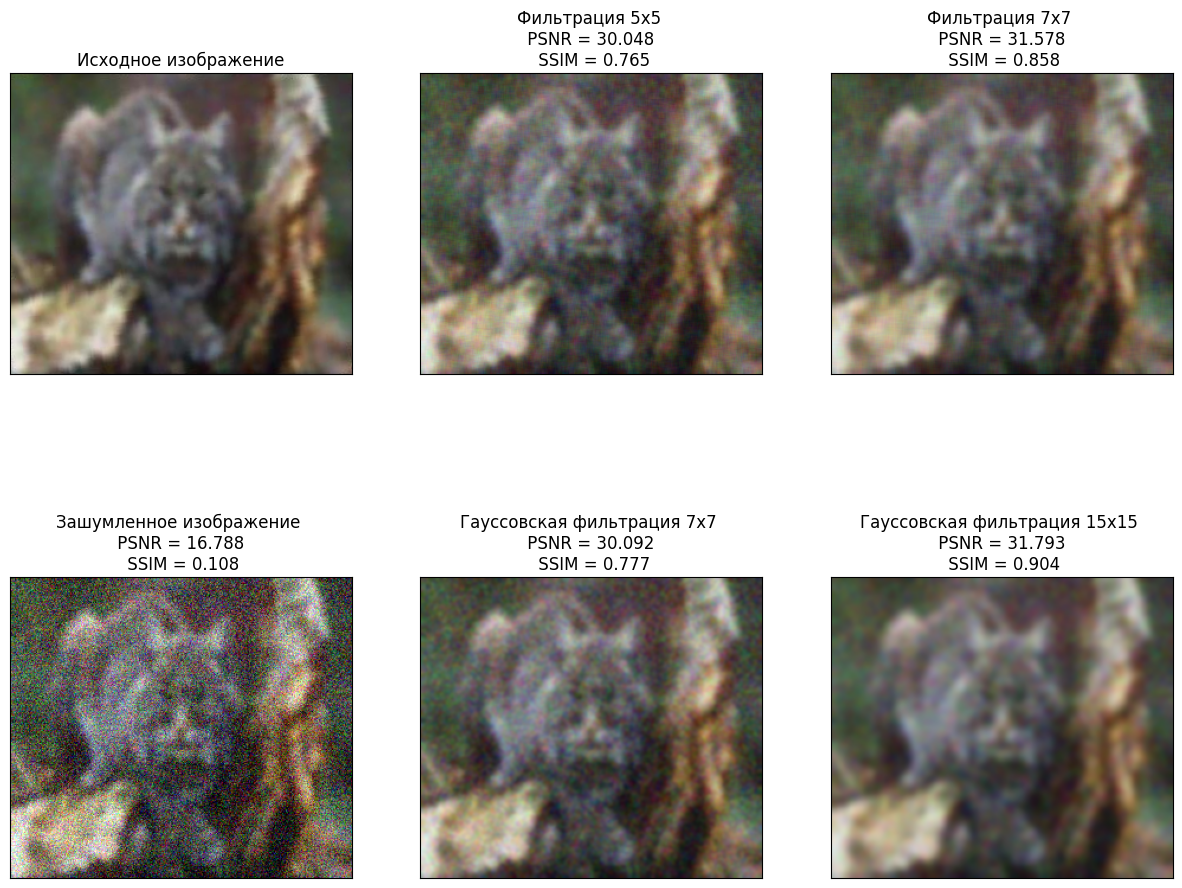

In [3]:
kernel55 = np.ones((5, 5), np.float32) / 25
kernel77 = np.ones((7, 7), np.float32) / 49

# изображение на три канала (RGB)
channels = cv2.split(final_rotated_image)

# гауссовский шум к каждому каналу
noisy_channels = [util.add_gauss_noise(channel, 0, 0.15) for channel in channels]

# линейная фильтрация к каждому каналу
filtered_channels1 = [cv2.filter2D(noisy_channel, -1, kernel55) for noisy_channel in noisy_channels]
filtered_channels2 = [cv2.filter2D(noisy_channel, -1, kernel77) for noisy_channel in noisy_channels]

# гауссовская фильтрация к каждому каналу
gaussian_channels1 = [cv2.GaussianBlur(noisy_channel, (7, 7), 0) for noisy_channel in noisy_channels]
gaussian_channels2 = [cv2.GaussianBlur(noisy_channel, (15, 15), 0) for noisy_channel in noisy_channels]

noisy_image = cv2.merge(noisy_channels)
filtered_image1 = cv2.merge(filtered_channels1)
filtered_image2 = cv2.merge(filtered_channels2)
gaussian_image1 = cv2.merge(gaussian_channels1)
gaussian_image2 = cv2.merge(gaussian_channels2)

gs = plt.GridSpec(2, 3)
plt.figure(figsize=(15, 12))

plt.subplot(gs[0, 0])
plt.xticks([]), plt.yticks([])
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(final_rotated_image, cv2.COLOR_BGR2RGB))

plt.subplot(gs[1, 0])
plt.xticks([]), plt.yticks([])
psnr = util.getPSNR(final_rotated_image, noisy_image)
ssim = util.getSSIM(final_rotated_image, noisy_image)
plt.title(f'Зашумленное изображение \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))

plt.subplot(gs[0, 1])
plt.xticks([]), plt.yticks([])
psnr = util.getPSNR(final_rotated_image, filtered_image1)
ssim = util.getSSIM(final_rotated_image, filtered_image1)
plt.title(f'Фильтрация 5x5 \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')
plt.imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))

plt.subplot(gs[0, 2])
plt.xticks([]), plt.yticks([])
psnr = util.getPSNR(final_rotated_image, filtered_image2)
ssim = util.getSSIM(final_rotated_image, filtered_image2)
plt.title(f'Фильтрация 7x7 \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')
plt.imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))

plt.subplot(gs[1, 1])
plt.xticks([]), plt.yticks([])
psnr = util.getPSNR(final_rotated_image, gaussian_image1)
ssim = util.getSSIM(final_rotated_image, gaussian_image1)
plt.title(f'Гауссовская фильтрация 7x7 \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')
plt.imshow(cv2.cvtColor(gaussian_image1, cv2.COLOR_BGR2RGB))

plt.subplot(gs[1, 2])
plt.xticks([]), plt.yticks([])
psnr = util.getPSNR(final_rotated_image, gaussian_image2)
ssim = util.getSSIM(final_rotated_image, gaussian_image2)
plt.title(f'Гауссовская фильтрация 15x15 \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')
plt.imshow(cv2.cvtColor(gaussian_image2, cv2.COLOR_BGR2RGB))

plt.show()


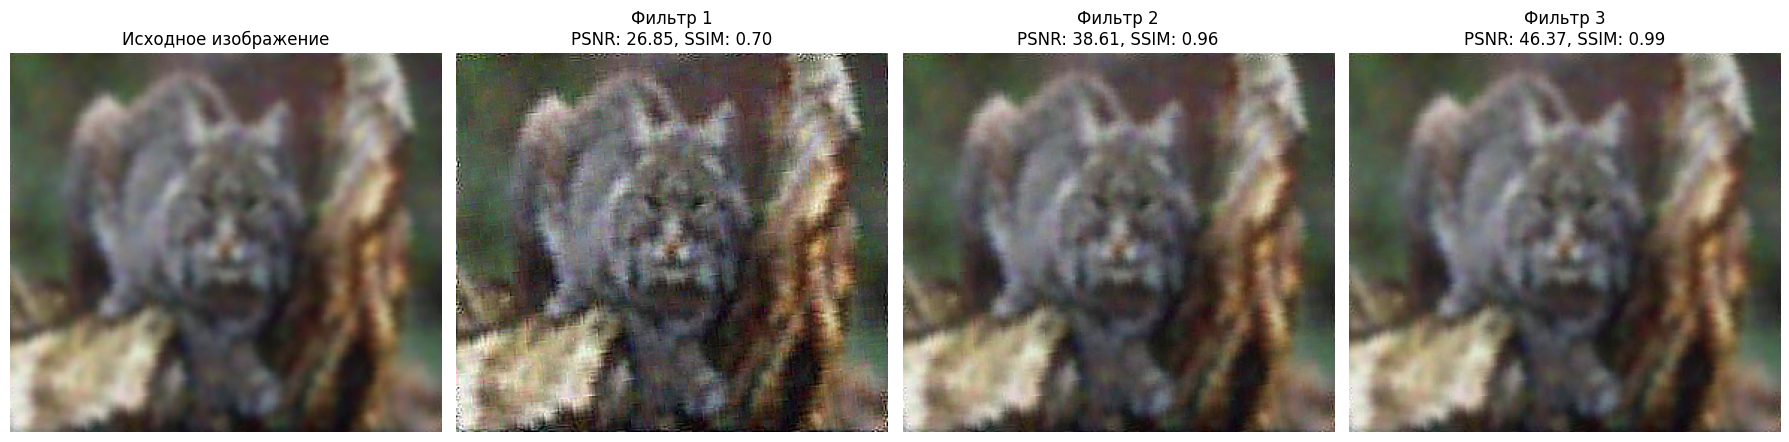

In [26]:
kernel1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
kernel2 = np.array([[-0.25, -0.25, -0.25], [-0.25, 3, -0.25], [-0.25, -0.25, -0.25]])
kernel3 = np.array([[0, -0.25, 0], [-0.25, 2, -0.25], [0, -0.25, 0]])


filtered_image1 = cv2.filter2D(final_rotated_image, -1, kernel1)
filtered_image2 = cv2.filter2D(final_rotated_image, -1, kernel2)
filtered_image3 = cv2.filter2D(final_rotated_image, -1, kernel3)


psnr1 = util.getPSNR(final_rotated_image, filtered_image1)
ssim1 = util.getSSIM(final_rotated_image, filtered_image1)

psnr2 = util.getPSNR(final_rotated_image, filtered_image2)
ssim2 = util.getSSIM(final_rotated_image, filtered_image2)

psnr3 = util.getPSNR(final_rotated_image, filtered_image3)
ssim3 = util.getSSIM(final_rotated_image, filtered_image3)


plt.figure(figsize=(18, 8))

plt.subplot(141)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(final_rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(142)
plt.title(f'Фильтр 1\nPSNR: {psnr1:.2f}, SSIM: {ssim1:.2f}')
plt.imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(143)
plt.title(f'Фильтр 2\nPSNR: {psnr2:.2f}, SSIM: {ssim2:.2f}')
plt.imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(144)
plt.title(f'Фильтр 3\nPSNR: {psnr3:.2f}, SSIM: {ssim3:.2f}')
plt.imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()



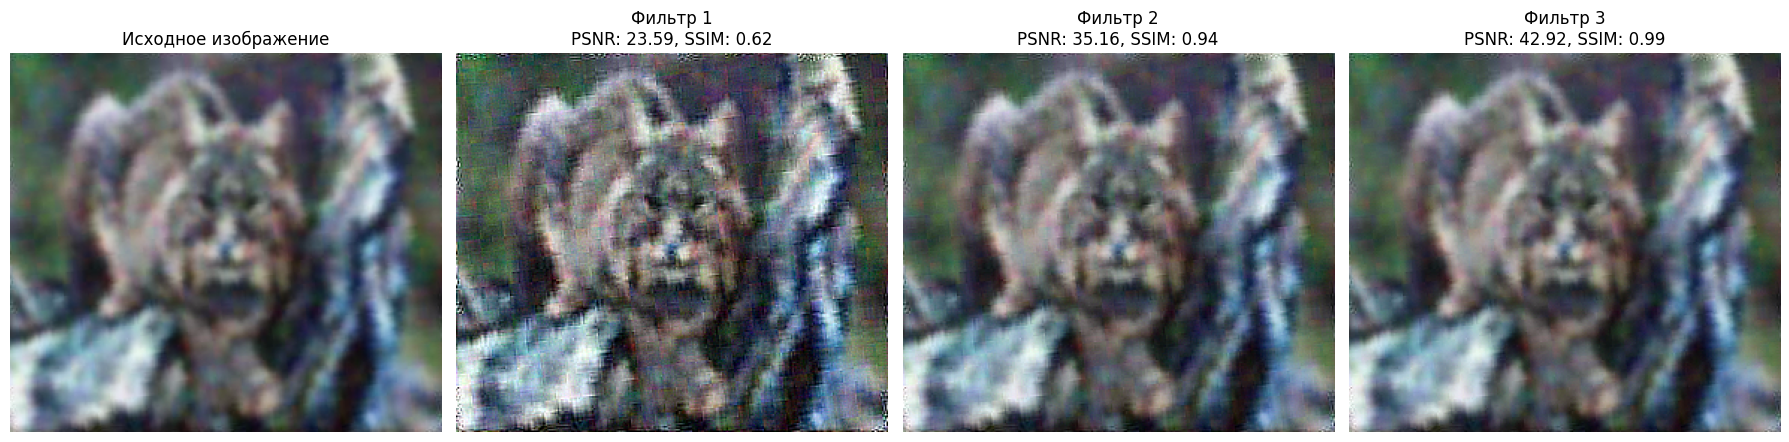